In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset
df = pd.read_excel('E:/Code/STAT3013.-P12_Nhom4/Dataset/Silver_data_filtered.xlsx')

In [3]:

# Add an 'index' column explicitly to use as a feature, starting from 1
df['index'] = df.index + 1

In [4]:
# Display the first few rows
print(df.head())

# Check for any missing values
print(df.isnull().sum())

        date    open    high     low   close  volume  index
0 2019-03-01  15.555  15.575  15.080  15.169     585      1
1 2019-03-04  15.170  15.205  15.005  15.017     317      2
2 2019-03-05  15.025  15.075  15.005  15.020     222      3
3 2019-03-06  15.025  15.025  14.975  15.003      25      4
4 2019-03-07  15.025  15.025  14.920  14.960       8      5
date      0
open      0
high      0
low       0
close     0
volume    0
index     0
dtype: int64


In [5]:
# Normalize the 'index' column to improve model performance
scaler = StandardScaler()
df['index_normalized'] = scaler.fit_transform(df[['index']])

In [6]:
# Check the data types of all columns in the DataFrame
print(df.dtypes)


date                datetime64[ns]
open                       float64
high                       float64
low                        float64
close                      float64
volume                       int64
index                        int64
index_normalized           float64
dtype: object



SPLITING DATA 7-2-1


In [7]:
# Split the data into training, testing, and validation sets (7:2:1)
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [8]:
# Prepare data for training model
x_train = train_data[['index_normalized']].values
y_train = train_data['close'].values

In [9]:
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [10]:
# Testing process
x_test = test_data[['index_normalized']].values
y_test = test_data['close'].values
y_pred = model.predict(x_test)

# Validation process
x_val = val_data[['index_normalized']].values
y_val = val_data['close'].values
y_pred_val = model.predict(x_val)

In [11]:
# Create index predict for next 30 days
last_index = df['index'].iloc[-1]
next_30_indices = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)  # Corrected to start from last_index + 1
next_30_indices_normalized = scaler.transform(next_30_indices)

# Predict gold prices for the next 30 days
next_30_days = pd.DataFrame({'index': range(last_index + 1, last_index + 31)})  # Corrected to start from last_index + 1
next_30_days['predicted_close'] = model.predict(next_30_indices_normalized)

# Print predicted prices for the next 30 days
print("Predicted Gold Prices for the Next 30 Days:")
print(next_30_days)

Predicted Gold Prices for the Next 30 Days:
    index  predicted_close
0    1339        28.504111
1    1340        28.512625
2    1341        28.521140
3    1342        28.529654
4    1343        28.538168
5    1344        28.546683
6    1345        28.555197
7    1346        28.563711
8    1347        28.572226
9    1348        28.580740
10   1349        28.589254
11   1350        28.597769
12   1351        28.606283
13   1352        28.614797
14   1353        28.623312
15   1354        28.631826
16   1355        28.640340
17   1356        28.648855
18   1357        28.657369
19   1358        28.665883
20   1359        28.674398
21   1360        28.682912
22   1361        28.691426
23   1362        28.699941
24   1363        28.708455
25   1364        28.716969
26   1365        28.725484
27   1366        28.733998
28   1367        28.742512
29   1368        28.751027


c:\Users\M S I\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [12]:
# Evaluate model performance
train_predictions = model.predict(x_train)
print("Training Set Performance:")
print("MAE:", mean_absolute_error(y_train, train_predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_train, train_predictions)))
print("MAPE:", mean_absolute_percentage_error(y_train, train_predictions))

print("\nTest Set Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

print("\nValidation Set Performance:")
print("MAE:", mean_absolute_error(y_val, y_pred_val))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_val)))
print("MAPE:", mean_absolute_percentage_error(y_val, y_pred_val))

Training Set Performance:
MAE: 2.9329902413886275
RMSE: 3.5171895560199196
MAPE: 0.14149089652933405

Test Set Performance:
MAE: 2.9356633049603094
RMSE: 3.2114498097468096
MAPE: 0.12909831957409715

Validation Set Performance:
MAE: 2.9697599378637993
RMSE: 3.431988273178159
MAPE: 0.12265816497568123


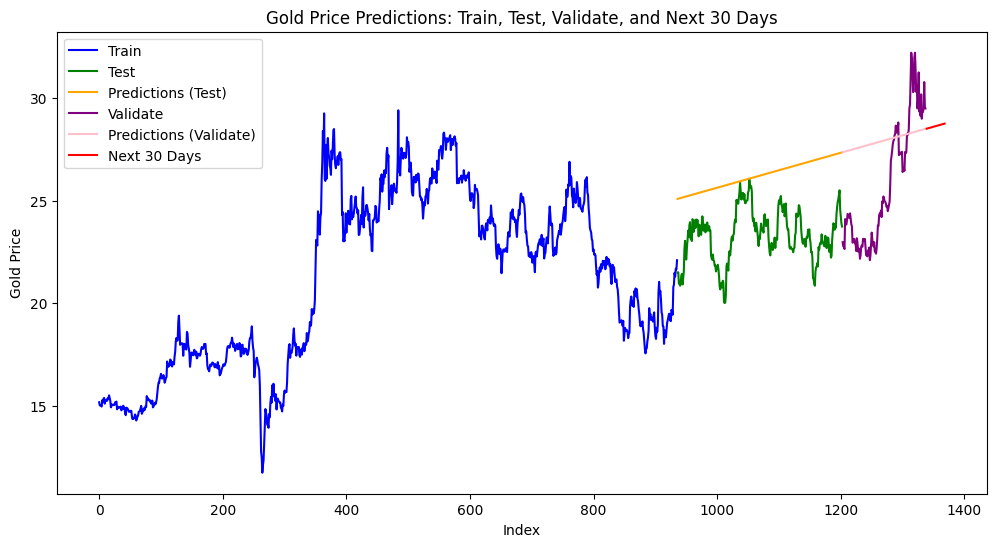

In [13]:
# Plot the training, testing, validation, and prediction results
plt.figure(figsize=(12, 6))

# Plot the train data
plt.plot(train_data.index, train_data['close'], label='Train', color='blue')

# Plot the test data
plt.plot(test_data.index, test_data['close'], label='Test', color='green')

# Plot predictions for the test data
plt.plot(test_data.index, y_pred, label='Predictions (Test)', color='orange')

# Plot the validation data
plt.plot(val_data.index, val_data['close'], label='Validate', color='purple')

# Plot predictions for the validation data
plt.plot(val_data.index, y_pred_val, label='Predictions (Validate)', color='pink')

# Plot predictions for the next 30 days
plt.plot(next_30_days['index'], next_30_days['predicted_close'], label='Next 30 Days', color='red')

# Add legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Gold Price')
plt.title('Gold Price Predictions: Train, Test, Validate, and Next 30 Days')
plt.show()


In [14]:
import statsmodels.api as sm
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['close'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     710.2
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          7.95e-126
Time:                        22:30:06   Log-Likelihood:                -3463.3
No. Observations:                1338   AIC:                             6931.
Df Residuals:                    1336   BIC:                             6941.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.9370      0.176    101.855      0.0

I. Analyze Residuals (7:2:1)

1. Residual Plot

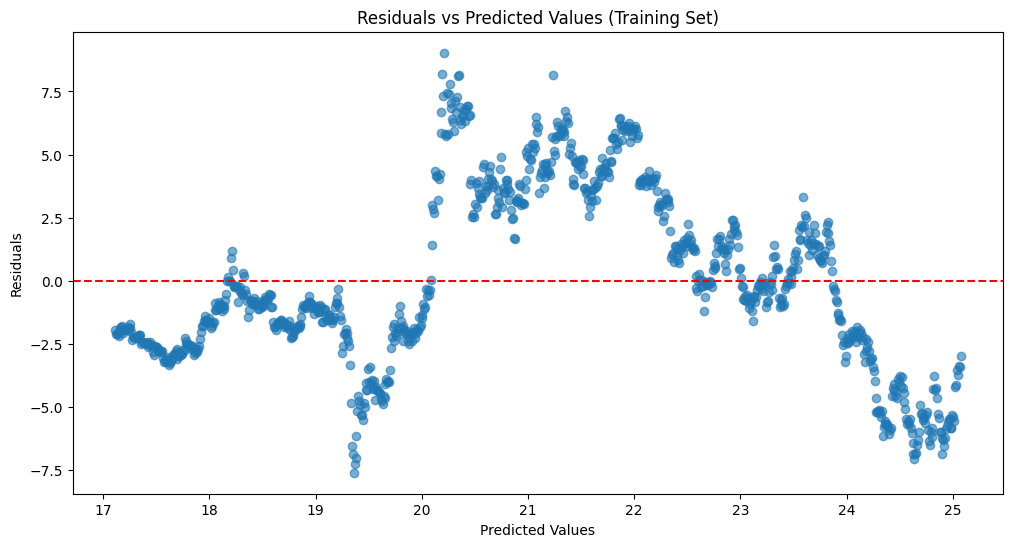

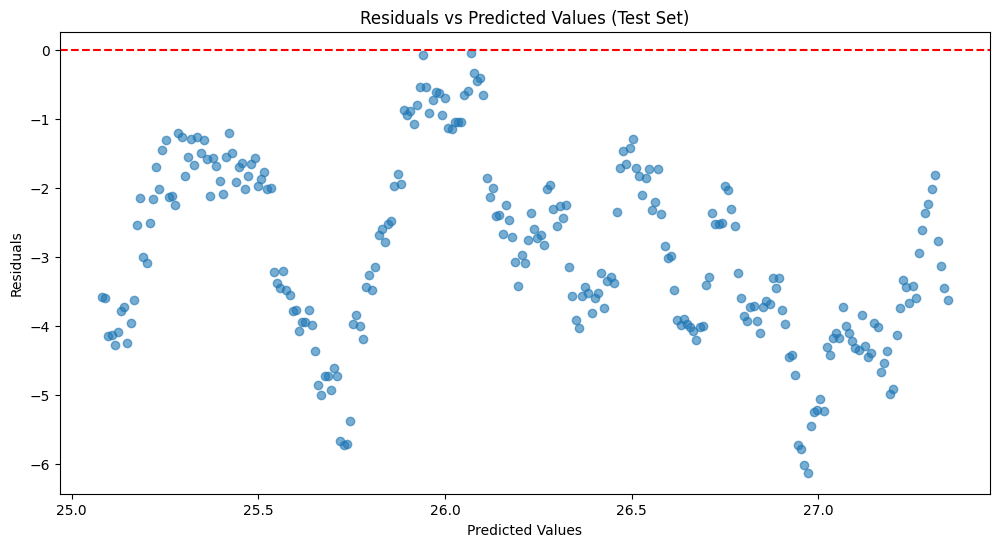

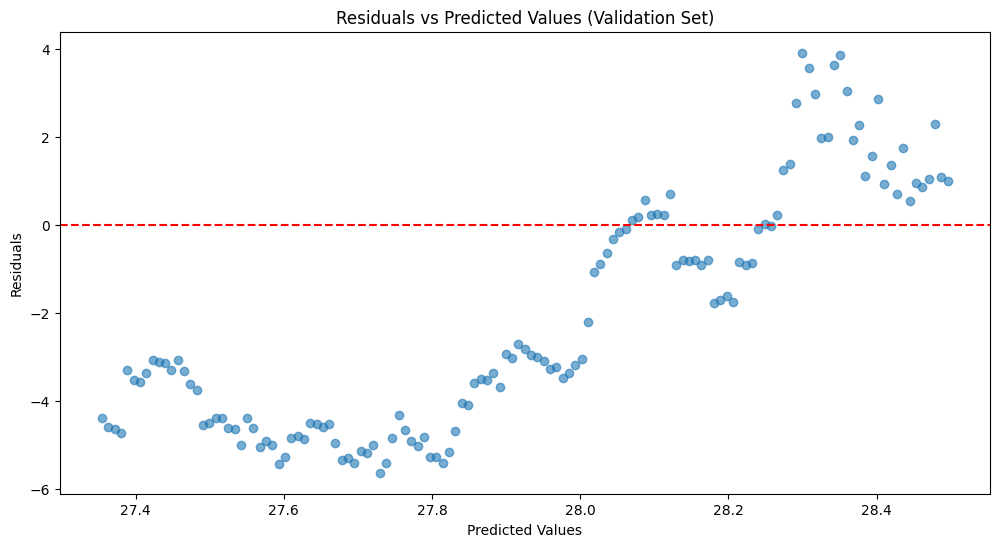

In [15]:
import matplotlib.pyplot as plt
# Calcualte y_pred_train
y_pred_train = model.predict(x_train)
# Giả sử bạn đã có các phần dư của từng tập dữ liệu
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred
residuals_val = y_val - y_pred_val

# Plotting residuals for the training set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_train, residuals_train, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Training Set)')
plt.show()

# Plotting residuals for the test set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals_test, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Test Set)')
plt.show()

# Plotting residuals for the validation set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_val, residuals_val, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Validation Set)')
plt.show()


2. Q-Q PLOT

<Figure size 800x600 with 0 Axes>

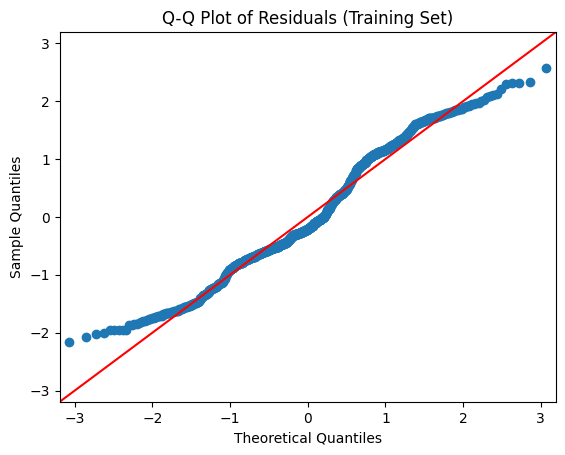

<Figure size 800x600 with 0 Axes>

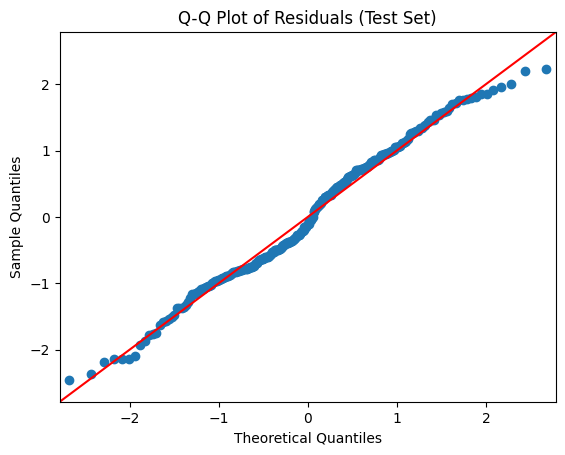

<Figure size 800x600 with 0 Axes>

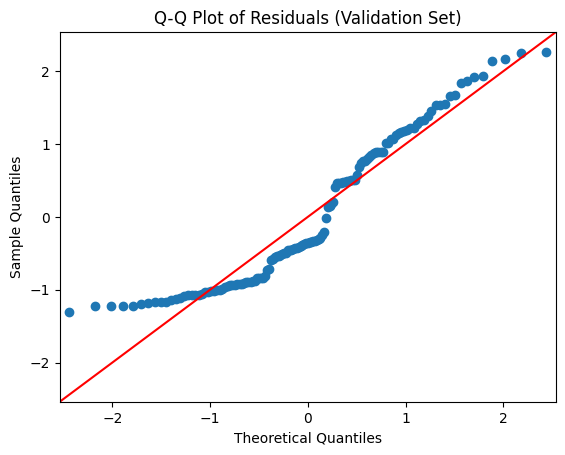

In [16]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Q-Q Plot cho tập huấn luyện (Training Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_train, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Training Set)')
plt.show()

# Q-Q Plot cho tập kiểm tra (Test Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_test, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Test Set)')
plt.show()

# Q-Q Plot cho tập kiểm định (Validation Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_val, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Validation Set)')
plt.show()


3. Durbin-Watson

In [17]:
from statsmodels.stats.stattools import durbin_watson

# Tính Durbin-Watson statistic cho tập huấn luyện (Training Set)
dw_train = durbin_watson(residuals_train)
print('Durbin-Watson statistic (Training Set):', dw_train)

# Tính Durbin-Watson statistic cho tập kiểm tra (Test Set)
dw_test = durbin_watson(residuals_test)
print('Durbin-Watson statistic (Test Set):', dw_test)

# Tính Durbin-Watson statistic cho tập kiểm định (Validation Set)
dw_val = durbin_watson(residuals_val)
print('Durbin-Watson statistic (Validation Set):', dw_val)


Durbin-Watson statistic (Training Set): 0.018502630326113104
Durbin-Watson statistic (Test Set): 0.014213273533000826
Durbin-Watson statistic (Validation Set): 0.02524389883610857


SPLITING DATA 6-3-1

In [18]:
# Split the data into training, testing, and validation sets (7:2:1)
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [19]:
# Prepare data for training model
x_train = train_data[['index_normalized']].values
y_train = train_data['close'].values

In [20]:
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [21]:
# Testing process
x_test = test_data[['index_normalized']].values
y_test = test_data['close'].values
y_pred = model.predict(x_test)

# Validation process
x_val = val_data[['index_normalized']].values
y_val = val_data['close'].values
y_pred_val = model.predict(x_val)

In [22]:
# Create index predict for next 30 days
last_index = df['index'].iloc[-1]
next_30_indices = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)  # Corrected to start from last_index + 1
next_30_indices_normalized = scaler.transform(next_30_indices)

# Predict gold prices for the next 30 days
next_30_days = pd.DataFrame({'index': range(last_index + 1, last_index + 31)})  # Corrected to start from last_index + 1
next_30_days['predicted_close'] = model.predict(next_30_indices_normalized)

# Print predicted prices for the next 30 days
print("Predicted Gold Prices for the Next 30 Days:")
print(next_30_days)

Predicted Gold Prices for the Next 30 Days:
    index  predicted_close
0    1339        35.523800
1    1340        35.539000
2    1341        35.554200
3    1342        35.569400
4    1343        35.584600
5    1344        35.599800
6    1345        35.615001
7    1346        35.630201
8    1347        35.645401
9    1348        35.660601
10   1349        35.675801
11   1350        35.691001
12   1351        35.706201
13   1352        35.721402
14   1353        35.736602
15   1354        35.751802
16   1355        35.767002
17   1356        35.782202
18   1357        35.797402
19   1358        35.812602
20   1359        35.827803
21   1360        35.843003
22   1361        35.858203
23   1362        35.873403
24   1363        35.888603
25   1364        35.903803
26   1365        35.919003
27   1366        35.934204
28   1367        35.949404
29   1368        35.964604


c:\Users\M S I\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
# Evaluate model performance
train_predictions = model.predict(x_train)
print("Training Set Performance:")
print("MAE:", mean_absolute_error(y_train, train_predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_train, train_predictions)))
print("MAPE:", mean_absolute_percentage_error(y_train, train_predictions))

print("\nTest Set Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

print("\nValidation Set Performance:")
print("MAE:", mean_absolute_error(y_val, y_pred_val))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_val)))
print("MAPE:", mean_absolute_percentage_error(y_val, y_pred_val))

Training Set Performance:
MAE: 2.252919110101884
RMSE: 2.7770213017526344
MAPE: 0.10481327980378083

Test Set Performance:
MAE: 8.231382376935331
RMSE: 8.38706381821791
MAPE: 0.3779147913023294

Validation Set Performance:
MAE: 8.721004186671774
RMSE: 9.059057922029307
MAPE: 0.3531547652514683


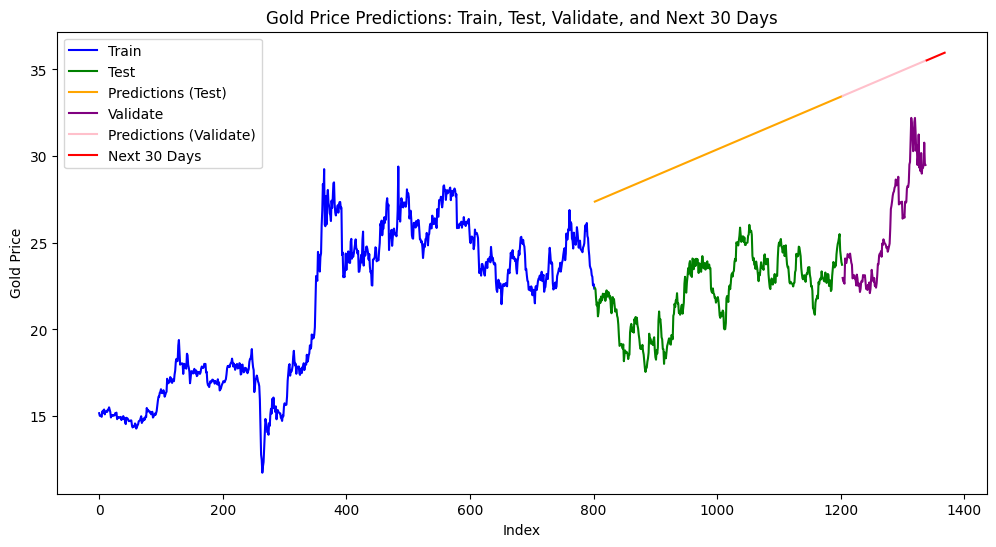

In [24]:
# Plot the training, testing, validation, and prediction results
plt.figure(figsize=(12, 6))

# Plot the train data
plt.plot(train_data.index, train_data['close'], label='Train', color='blue')

# Plot the test data
plt.plot(test_data.index, test_data['close'], label='Test', color='green')

# Plot predictions for the test data
plt.plot(test_data.index, y_pred, label='Predictions (Test)', color='orange')

# Plot the validation data
plt.plot(val_data.index, val_data['close'], label='Validate', color='purple')

# Plot predictions for the validation data
plt.plot(val_data.index, y_pred_val, label='Predictions (Validate)', color='pink')

# Plot predictions for the next 30 days
plt.plot(next_30_days['index'], next_30_days['predicted_close'], label='Next 30 Days', color='red')

# Add legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Gold Price')
plt.title('Gold Price Predictions: Train, Test, Validate, and Next 30 Days')
plt.show()


In [25]:
import statsmodels.api as sm
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['close'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     710.2
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          7.95e-126
Time:                        22:30:06   Log-Likelihood:                -3463.3
No. Observations:                1338   AIC:                             6931.
Df Residuals:                    1336   BIC:                             6941.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.9370      0.176    101.855      0.0

I. Analyze Residuals (6:3:1)

1. Residual Plot

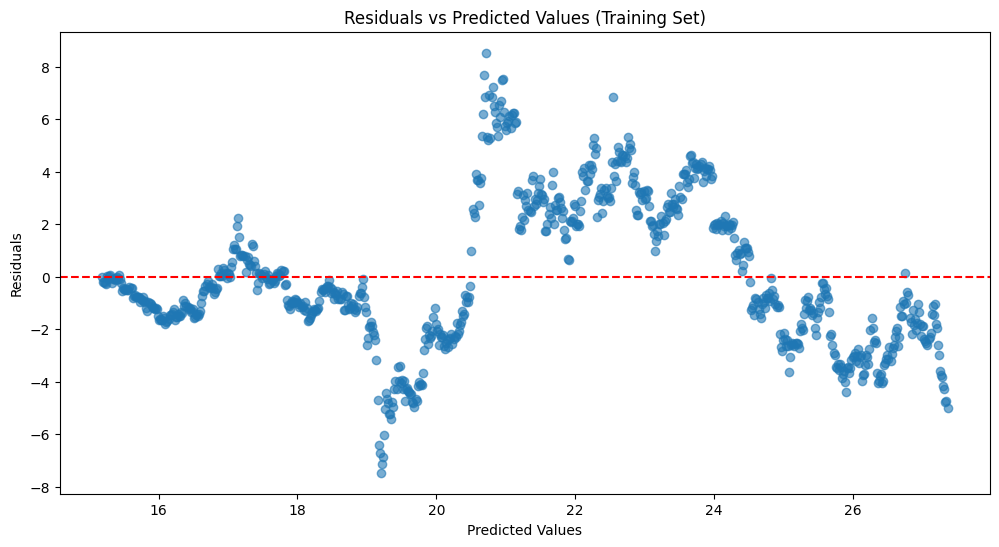

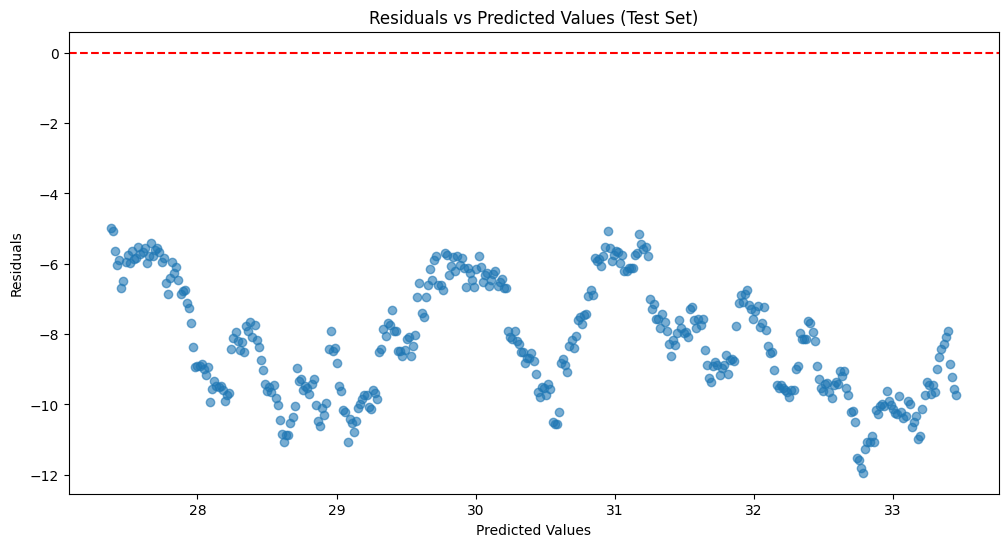

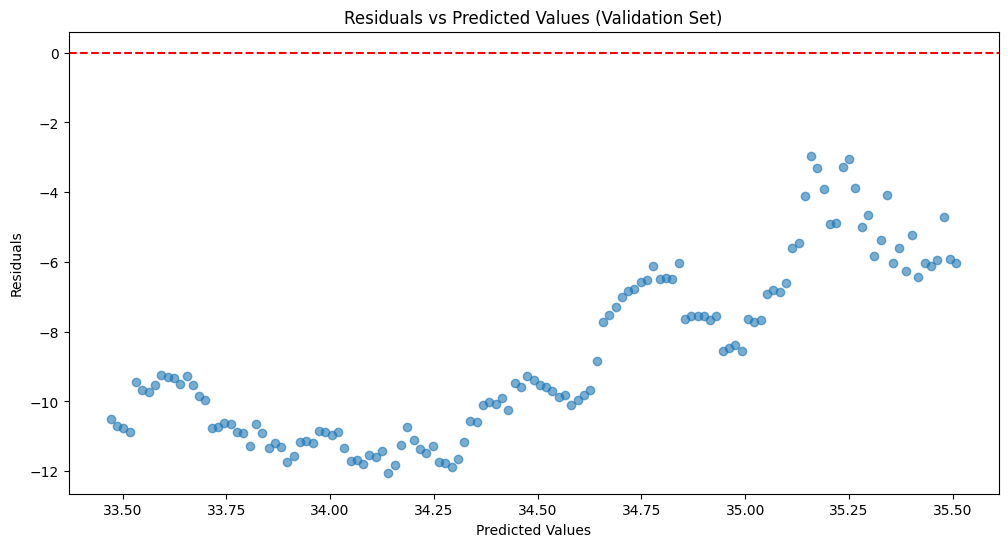

In [26]:
import matplotlib.pyplot as plt
# Calcualte y_pred_train
y_pred_train = model.predict(x_train)
# Giả sử bạn đã có các phần dư của từng tập dữ liệu
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred
residuals_val = y_val - y_pred_val

# Plotting residuals for the training set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_train, residuals_train, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Training Set)')
plt.show()

# Plotting residuals for the test set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals_test, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Test Set)')
plt.show()

# Plotting residuals for the validation set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_val, residuals_val, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Validation Set)')
plt.show()


2. Q-Q PLOTS

<Figure size 800x600 with 0 Axes>

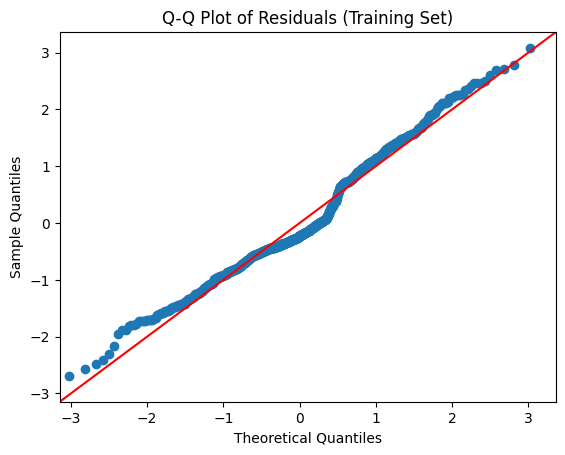

<Figure size 800x600 with 0 Axes>

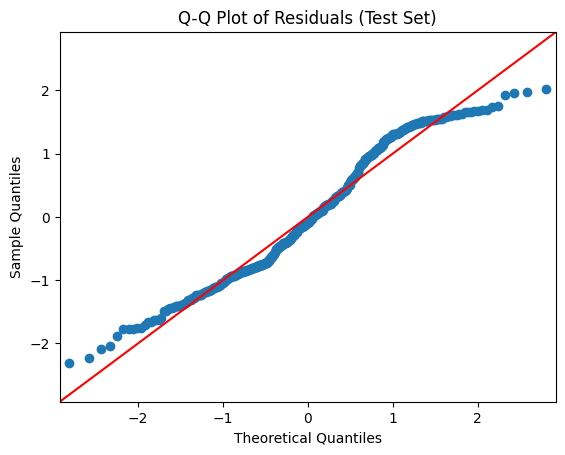

<Figure size 800x600 with 0 Axes>

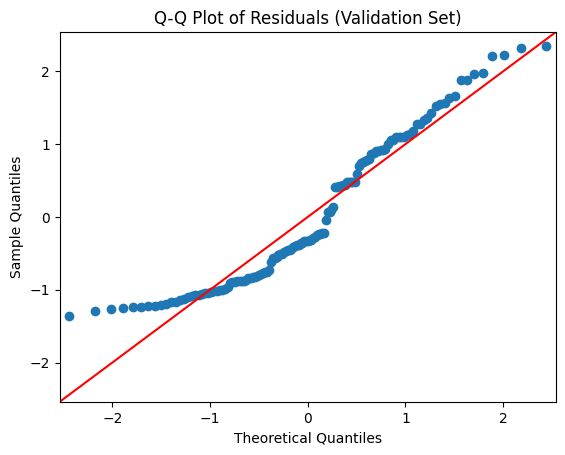

In [27]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Q-Q Plot cho tập huấn luyện (Training Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_train, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Training Set)')
plt.show()

# Q-Q Plot cho tập kiểm tra (Test Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_test, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Test Set)')
plt.show()

# Q-Q Plot cho tập kiểm định (Validation Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_val, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Validation Set)')
plt.show()


3. Durbin-Watson

In [28]:
from statsmodels.stats.stattools import durbin_watson

# Tính Durbin-Watson statistic cho tập huấn luyện (Training Set)
dw_train = durbin_watson(residuals_train)
print('Durbin-Watson statistic (Training Set):', dw_train)

# Tính Durbin-Watson statistic cho tập kiểm tra (Test Set)
dw_test = durbin_watson(residuals_test)
print('Durbin-Watson statistic (Test Set):', dw_test)

# Tính Durbin-Watson statistic cho tập kiểm định (Validation Set)
dw_val = durbin_watson(residuals_val)
print('Durbin-Watson statistic (Validation Set):', dw_val)


Durbin-Watson statistic (Training Set): 0.03107990742106181
Durbin-Watson statistic (Test Set): 0.002183469657042955
Durbin-Watson statistic (Validation Set): 0.0036171644244537746


SPLITING DATA 5-3-2

In [29]:
# Split the data into training, testing, and validation sets (5:3:2)
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [30]:
# Prepare data for training model
x_train = train_data[['index_normalized']].values
y_train = train_data['close'].values

In [31]:
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [32]:
# Testing process
x_test = test_data[['index_normalized']].values
y_test = test_data['close'].values
y_pred = model.predict(x_test)

# Validation process
x_val = val_data[['index_normalized']].values
y_val = val_data['close'].values
y_pred_val = model.predict(x_val)

In [33]:
# Create index predict for next 30 days
last_index = df['index'].iloc[-1]
next_30_indices = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)  # Corrected to start from last_index + 1
next_30_indices_normalized = scaler.transform(next_30_indices)

# Predict gold prices for the next 30 days
next_30_days = pd.DataFrame({'index': range(last_index + 1, last_index + 31)})  # Corrected to start from last_index + 1
next_30_days['predicted_close'] = model.predict(next_30_indices_normalized)

# Print predicted prices for the next 30 days
print("Predicted Gold Prices for the Next 30 Days:")
print(next_30_days)

Predicted Gold Prices for the Next 30 Days:
    index  predicted_close
0    1339        41.301921
1    1340        41.322391
2    1341        41.342861
3    1342        41.363331
4    1343        41.383801
5    1344        41.404271
6    1345        41.424740
7    1346        41.445210
8    1347        41.465680
9    1348        41.486150
10   1349        41.506620
11   1350        41.527090
12   1351        41.547560
13   1352        41.568030
14   1353        41.588499
15   1354        41.608969
16   1355        41.629439
17   1356        41.649909
18   1357        41.670379
19   1358        41.690849
20   1359        41.711319
21   1360        41.731789
22   1361        41.752258
23   1362        41.772728
24   1363        41.793198
25   1364        41.813668
26   1365        41.834138
27   1366        41.854608
28   1367        41.875078
29   1368        41.895547


c:\Users\M S I\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [34]:
# Evaluate model performance
train_predictions = model.predict(x_train)
print("Training Set Performance:")
print("MAE:", mean_absolute_error(y_train, train_predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_train, train_predictions)))
print("MAPE:", mean_absolute_percentage_error(y_train, train_predictions))

print("\nTest Set Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

print("\nValidation Set Performance:")
print("MAE:", mean_absolute_error(y_val, y_pred_val))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_val)))
print("MAPE:", mean_absolute_percentage_error(y_val, y_pred_val))

Training Set Performance:
MAE: 1.9538356660043024
RMSE: 2.555068228975629
MAPE: 0.09533654536051454

Test Set Performance:
MAE: 9.336923915995003
RMSE: 9.925516075365701
MAPE: 0.4324849705062526

Validation Set Performance:
MAE: 13.972283391378744
RMSE: 14.096989177110476
MAPE: 0.5792894110253911


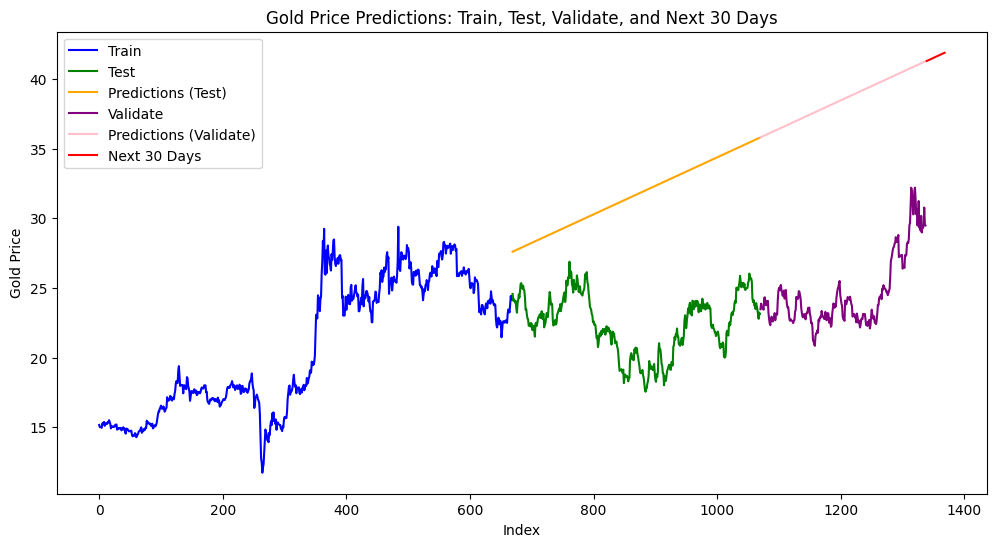

In [35]:
# Plot the training, testing, validation, and prediction results
plt.figure(figsize=(12, 6))

# Plot the train data
plt.plot(train_data.index, train_data['close'], label='Train', color='blue')

# Plot the test data
plt.plot(test_data.index, test_data['close'], label='Test', color='green')

# Plot predictions for the test data
plt.plot(test_data.index, y_pred, label='Predictions (Test)', color='orange')

# Plot the validation data
plt.plot(val_data.index, val_data['close'], label='Validate', color='purple')

# Plot predictions for the validation data
plt.plot(val_data.index, y_pred_val, label='Predictions (Validate)', color='pink')

# Plot predictions for the next 30 days
plt.plot(next_30_days['index'], next_30_days['predicted_close'], label='Next 30 Days', color='red')

# Add legend and labels
plt.legend()
plt.xlabel('Index')
plt.ylabel('Gold Price')
plt.title('Gold Price Predictions: Train, Test, Validate, and Next 30 Days')
plt.show()


In [36]:
import statsmodels.api as sm
X = sm.add_constant(df.index)
model_stat = sm.OLS(df['close'], X)
results = model_stat.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     710.2
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          7.95e-126
Time:                        22:30:07   Log-Likelihood:                -3463.3
No. Observations:                1338   AIC:                             6931.
Df Residuals:                    1336   BIC:                             6941.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.9370      0.176    101.855      0.0

I. Analyze Residuals (5:3:2)

1. Residual Plot

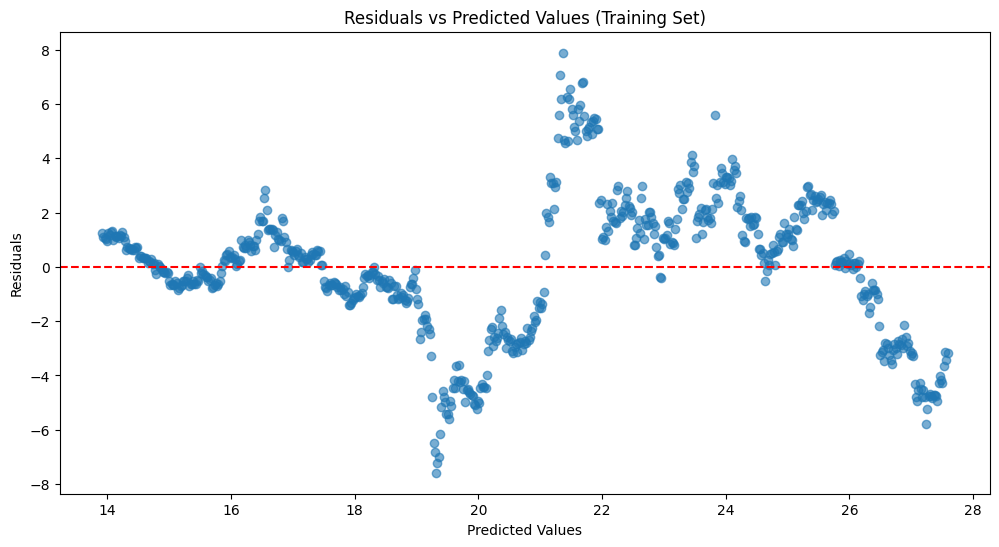

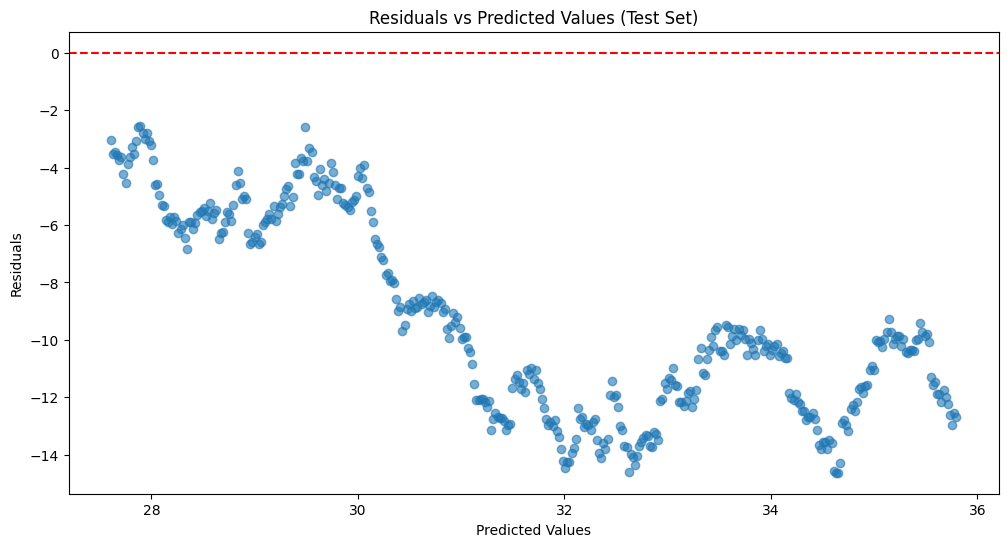

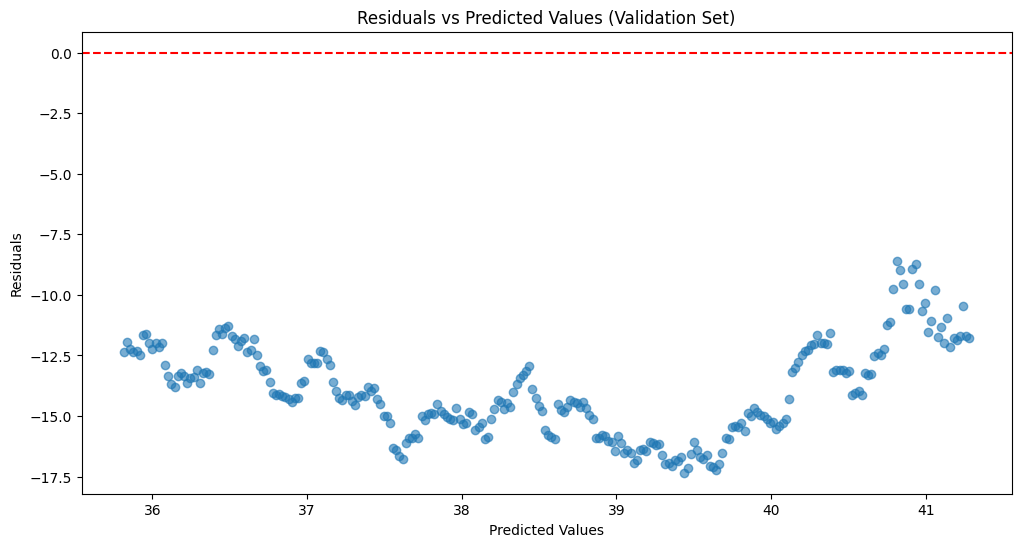

In [37]:
import matplotlib.pyplot as plt
# Calcualte y_pred_train
y_pred_train = model.predict(x_train)
# Giả sử bạn đã có các phần dư của từng tập dữ liệu
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred
residuals_val = y_val - y_pred_val

# Plotting residuals for the training set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_train, residuals_train, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Training Set)')
plt.show()

# Plotting residuals for the test set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals_test, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Test Set)')
plt.show()

# Plotting residuals for the validation set
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_val, residuals_val, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Validation Set)')
plt.show()

2. Q-Q PLOTS:

<Figure size 800x600 with 0 Axes>

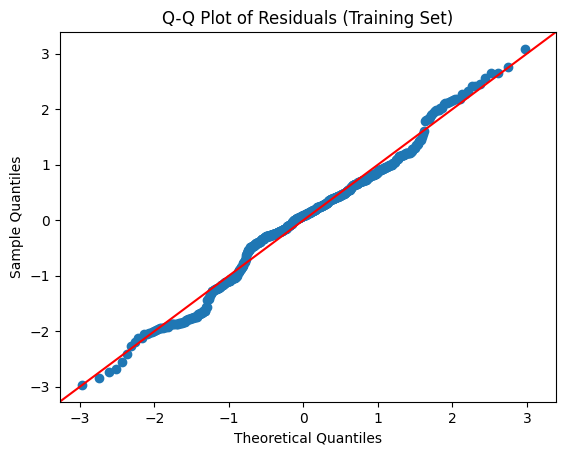

<Figure size 800x600 with 0 Axes>

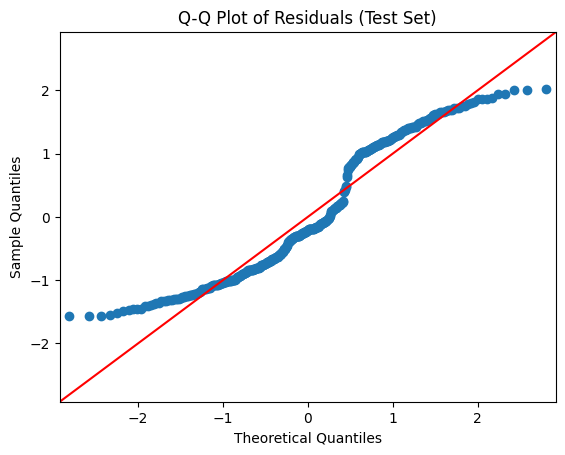

<Figure size 800x600 with 0 Axes>

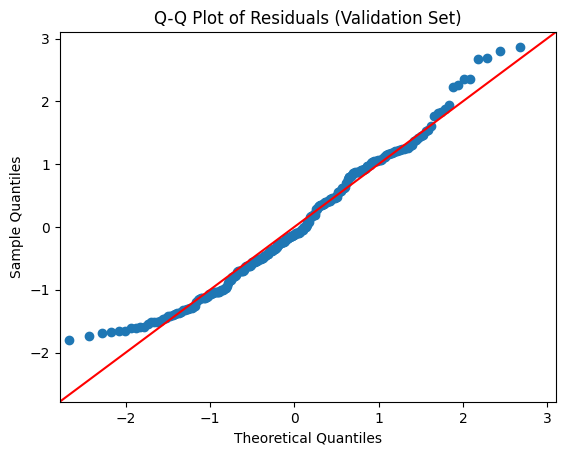

In [38]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Q-Q Plot cho tập huấn luyện (Training Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_train, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Training Set)')
plt.show()

# Q-Q Plot cho tập kiểm tra (Test Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_test, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Test Set)')
plt.show()

# Q-Q Plot cho tập kiểm định (Validation Set)
plt.figure(figsize=(8, 6))
sm.qqplot(residuals_val, line='45', fit=True)
plt.title('Q-Q Plot of Residuals (Validation Set)')
plt.show()

3. Durbin-Watson:


In [39]:
from statsmodels.stats.stattools import durbin_watson

# Tính Durbin-Watson statistic cho tập huấn luyện (Training Set)
dw_train = durbin_watson(residuals_train)
print('Durbin-Watson statistic (Training Set):', dw_train)

# Tính Durbin-Watson statistic cho tập kiểm tra (Test Set)
dw_test = durbin_watson(residuals_test)
print('Durbin-Watson statistic (Test Set):', dw_test)

# Tính Durbin-Watson statistic cho tập kiểm định (Validation Set)
dw_val = durbin_watson(residuals_val)
print('Durbin-Watson statistic (Validation Set):', dw_val)

Durbin-Watson statistic (Training Set): 0.03854213379213307
Durbin-Watson statistic (Test Set): 0.0017128436607081513
Durbin-Watson statistic (Validation Set): 0.001097923348852169
